In [1]:
import cv2, numpy as np
import time
from matplotlib import pyplot as plt
import pytesseract
%matplotlib inline
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\Tesseract'

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

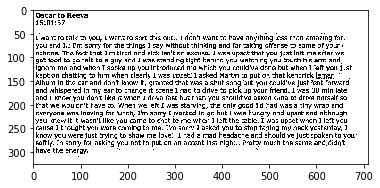

True

In [2]:
image = cv2.imread('ocr-text.png',0)   
binary = cv2.adaptiveThreshold(image, 255,
          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
          cv2.THRESH_BINARY, 21, 5)
imshow("", binary)
cv2.imwrite("out.png", binary)

In [9]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\Tesseract'
str = pytesseract.image_to_string('out.png')
print(str)
print(type(str))

Oscar to Reeva
15:01:37.

T want to talk to you, T want to sort this out.: I don’t want to have anything jess than amazing for.
you and I.: I'm sorry for the things I say without thinking and for taking offense to some of your
actions. The fact that I'm tired and sick Isn't an excuse. I was upset that you just left me after we
got food to go talk to a guy and I was standing tight behind you watching you touch his arm and
Ignore me and when I spoke up you Introduced ma which. you could've done but when I teft you just:
kept on chatting to him when clearly I was upset. I asked Martin to put on that kendrick
‘Album in the car and don’t know it, granted that was a shut song but you could've just tent forward
and whispered In my ear to change it scene I had to drive to pick up your friend. I was 30 min late
and I know you don’t like it when I drive fast but then you should've asked Gina to drive herself so
that we wouldn't have to. When we left I was starving, the only good I'd had was a ti

In [21]:
str = pytesseract.image_to_string('mart5.jpg', lang='kor')
print(str)

여
ㅇ
10.0861

사업지번로:

그ㅋ  1ㅎㆍ
진량. 먼오:

2:40-22:
2.7390
4200원
420(원

감사합니다.


<img src='mart5.jpg'>

In [9]:
str = pytesseract.image_to_string('credit-card.jpg')
print(str)

FIFTH THIRD BANK

rf TRIO SAWS
ou %

ca ea =fO 2345) (Ep

i

ap pe |
YOUR NAME HERE

 

mastercard.


<img src='credit-card.jpg'>

In [20]:
str = pytesseract.image_to_string('personal_credit_card.png')
print(str)

pier

L234 5678 Les Sb?8
raed

JOHN SMITH


<img src='personal_credit_card.png'>

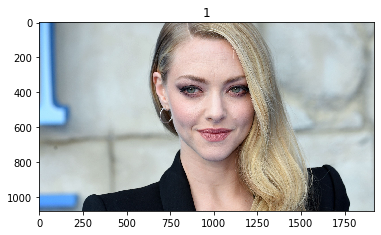

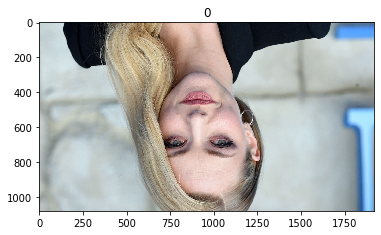

In [4]:
img = cv2.imread('AmandaSeyfried.jpg')
img2 = cv2.flip(img, 1) #1 = 좌우반전, 0 = 상하반전
imshow('1', img2)
img3 = cv2.flip(img, 0)
imshow('0', img3)

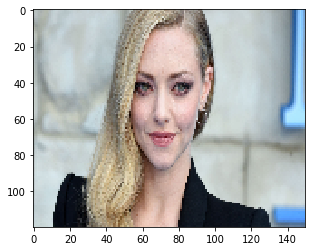

In [8]:
zoom1 = cv2.resize(img, (150, 120), interpolation=cv2.INTER_CUBIC)
imshow('', zoom1) #크기를 지정하여 사이즈 변경

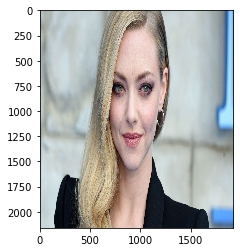

In [9]:
zoom2 = cv2.resize(img, None, fx=1, fy=2, interpolation = cv2.INTER_CUBIC)
imshow('', zoom2) # 비율에 따른 사이즈 변경, fx : x축 비율, fy: y축 비율

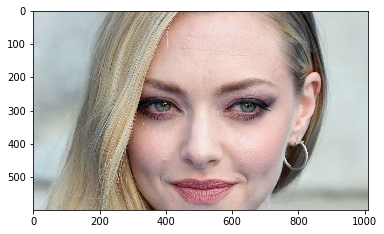

In [14]:
cropping = img[100:700, 400:1410]
imshow('', cropping) #이미지 잘라오기

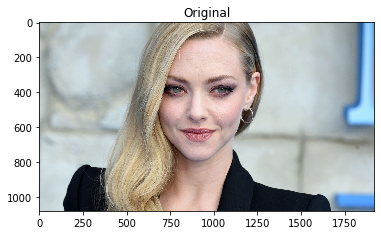

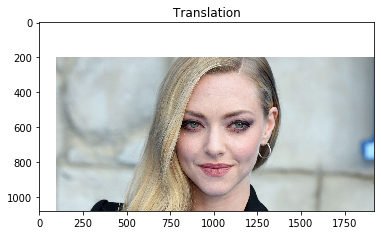

In [6]:
rows, cols = img.shape[:2]

# 변환 행렬, X축으로 10, Y축으로 20 이동
M = np.float32([[1,0,100],[0,1,200]])

dst = cv2.warpAffine(img, M,(cols, rows), borderValue=(255, 255, 255))
imshow('Original', img)
imshow('Translation', dst)

In [7]:
img.shape[:2]

(1080, 1920)

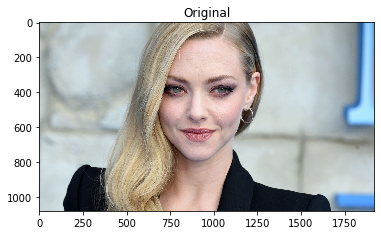

반복횟수:5
좌표 이동 범위:20
x축 이동 4  y축 이동 6


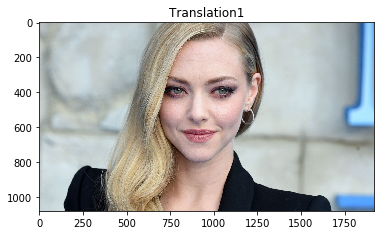

x축 이동 18  y축 이동 4


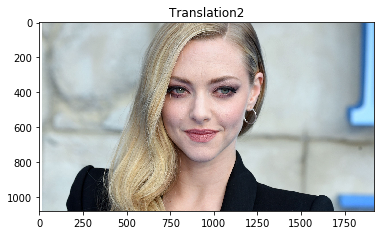

x축 이동 2  y축 이동 3


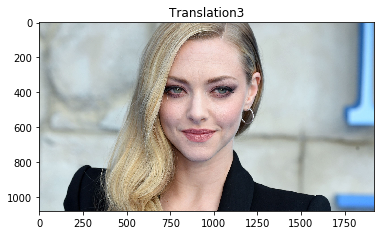

x축 이동 14  y축 이동 15


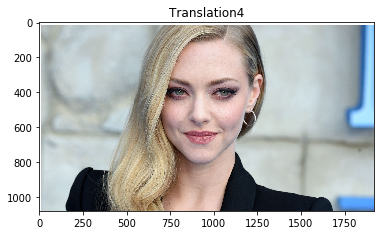

x축 이동 20  y축 이동 14


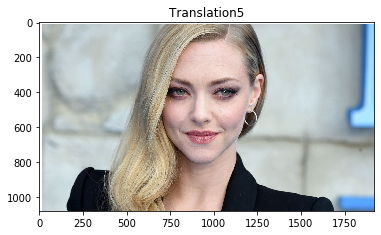

In [18]:
import random

imshow('Original', img)

i = 0
x = int(input("반복횟수:"))
y = int(input("좌표 이동 범위:"))

while i < x:
    a = random.randint(1, y)
    b = random.randint(1, y)
    print("x축 이동", a," y축 이동", b)
    M = np.float32([[1,0,a],[0,1,b]])
    dst = cv2.warpAffine(img, M,(cols, rows), borderValue=(255, 255, 255))
    imshow(f'Translation{i+1}', dst)
    i += 1

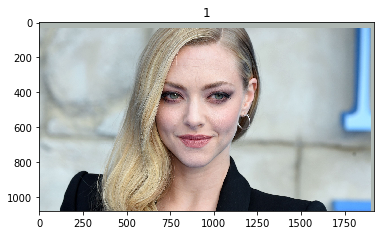

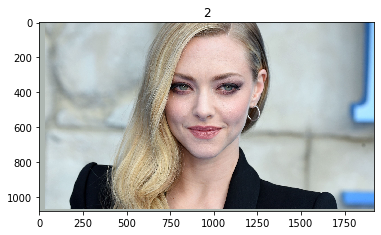

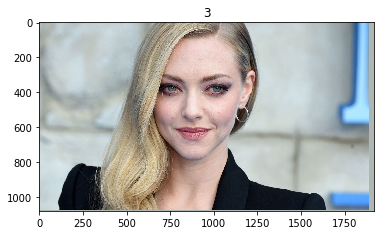

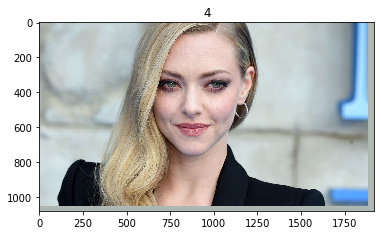

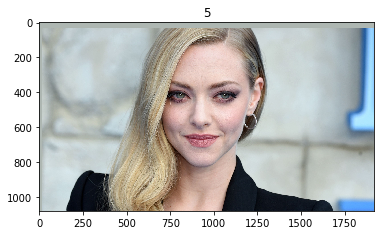

In [21]:
height, width = img.shape[:2]
dx = 50
r = np.random.randint(dx*2, size=(5, 2))-dx
M = np.float32([[1, 0, 0], [0, 1, 0]])

c = img[0, 0]

i = 1

for p in r.tolist():
    M[:,2] = p
    dst = cv2.warpAffine(img, M, (width, height), 
                        borderValue=(int(c[0]), int(c[1]), int(c[2])))
    imshow(f'{i}', dst)
    i += 1

[[ 3.42020143e-01  9.39692621e-01  1.24226647e+02]
 [-9.39692621e-01  3.42020143e-01  1.25741404e+03]]
(1080, 1920, 3)


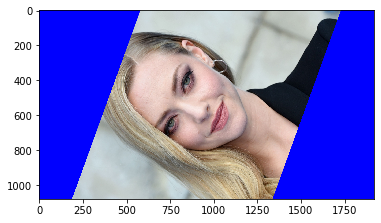

In [27]:
#이미지 회전
height, width = img.shape[:2]
img_center = (width/2, height/2)
M = cv2.getRotationMatrix2D(img_center, 70, 1.0) #회전중심(이미지 중심좌표), 회전각도(반시계), 회전시 스케일 크기(축소, 확대)
print(M)
img_rotated = cv2.warpAffine(img, M, (width, height), borderValue=(255, 0, 0))
print(img_rotated.shape)
imshow('', img_rotated)

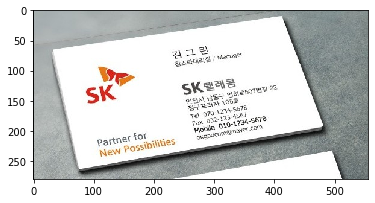

[[ 21. 103.]
 [226.  45.]
 [ 57. 226.]
 [280. 146.]]
[[  0.        0.     ]
 [213.04694   0.     ]
 [  0.      128.16005]
 [213.04694 128.16005]]
[[ 9.52791700e-01 -2.78865863e-01  8.71455823e+00]
 [ 3.43651489e-01  1.21463026e+00 -1.32323598e+02]
 [-2.77179728e-04  1.23033929e-03  1.00000000e+00]]


In [116]:
import math

def distance(x1, y1, x2, y2):
    result = math.sqrt( math.pow(x1 - x2, 2) + math.pow(y1 - y2, 2))
    return result

img = cv2.imread('sk_name.png')
imshow('', img)


cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    if len(approx) == 4:
        cv2.drawContours(img2, [approx], -1, (0, 255, 0), 5)
        print(approx)
        
imshow("Output", img2)

obj_width = distance(point_list[0][0], point_list[0][1], point_list[1][0], point_list[1][1])
obj_height = distance(point_list[0][0], point_list[0][1], point_list[2][0], point_list[2][1])

height, width = img.shape[:2]

idx = [1, 0, 2, 3]
point_list = np.array(approx[idx, 0, :])

pts1 = np.float32([list(point_list[0]), list(point_list[1]), list(point_list[2]), list(point_list[3])])
print(pts1) #원하는 이미지의 모서리 좌표

pts2 = np.float32([[0, 0], [obj_width, 0], [0, obj_height], [obj_width, obj_height]])
print(pts2) # 왼쪽 위 부터 좌 우 좌 우 순서

M = cv2.getPerspectiveTransform(pts1, pts2)
print(M)

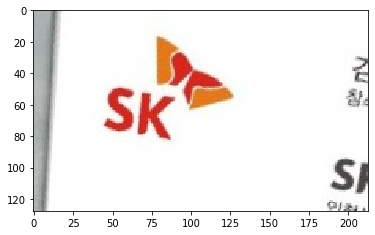


--------------------------------------------

--------------------------------------------
[]
[]
--------------------------------------------


In [117]:
img_result = cv2.warpPerspective(img, M, (int(obj_width), int(obj_height)))
imshow('', img_result)
cv2.imwrite('out.png', img_result)
str = pytesseract.image_to_string('out.png')
print(str)

print('--------------------------------------------')
import re

content = re.sub("[~]", "", str)

print(content)
print('--------------------------------------------')
num = []
nan = []

regex_1 = re.compile(r'\d{3,4} \d+-\d+')
regex_01 = re.compile(r'\d{3,4} \d+ \d+')
regex_001 = re.compile(r'\d{3,4}-\d+-\d+')

if regex_1.findall(content) != nan:
    num.append(regex_1.findall(content))
elif regex_01.findall(content) != nan:
    num.append(regex_01.findall(content))
elif regex_001.findall(content) != nan:
    num.append(regex_001.findall(content))

print(num)

regex_2 = re.compile(r'.*@.*')
email = regex_2.findall(content)
print(email)
print('--------------------------------------------')


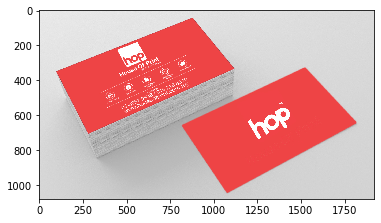

1080 1920


In [176]:
img = cv2.imread('name_card.png')
img2 = img.copy()
imshow('', img2)
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
height, width = img2.shape[:2]
print(height, width)

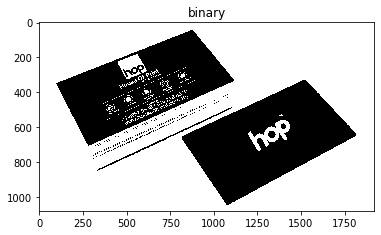

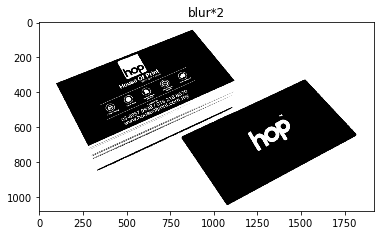

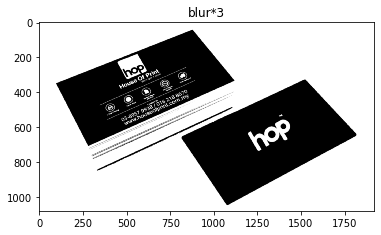

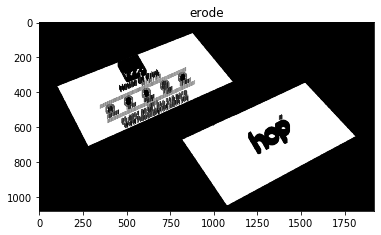

In [177]:
img_blur = cv2.GaussianBlur(gray, (3,3), 0)
_, binary =  cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
img_blur2 = cv2.GaussianBlur(binary, (5,5), 0)
img_blur3 = cv2.GaussianBlur(img_blur2, (5,5), 0)
imshow('binary', binary)
imshow('blur*2', img_blur2)
imshow('blur*3', img_blur3)

img_blur3 = 255 - img_blur3

eroded = cv2.morphologyEx(img_blur3, cv2.MORPH_ERODE, (5, 5), iterations=20)
imshow('erode', eroded)

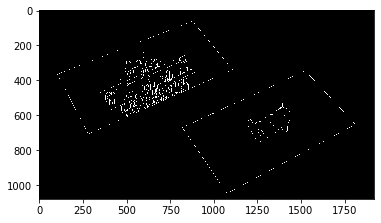

In [178]:
edged = cv2.Canny(eroded, 10, 250)
imshow('', edged)

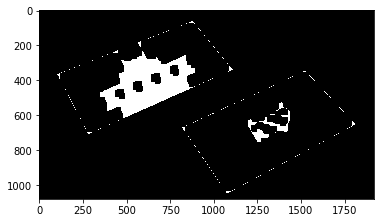

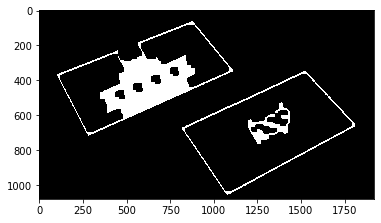

In [179]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel, iterations=5)
imshow("", closed)

dilated = cv2.morphologyEx(closed, cv2.MORPH_DILATE, (5, 5), iterations=10)
imshow('', dilated)

[[[1812  651]]

 [[1518  349]]

 [[ 821  673]]

 [[1082 1045]]]


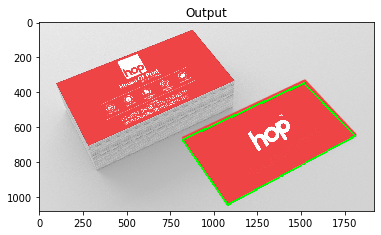

In [180]:
cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    if len(approx) == 4:
        cv2.drawContours(img2, [approx], -1, (0, 255, 0), 10)
        print(approx)

imshow("Output", img2)

In [181]:
height, width = img.shape[:2]
point_list = [[821,  673], [1518,  349], [1082, 1045], [1812,  651]]

pts1 = np.float32([list(point_list[0]), list(point_list[1]), list(point_list[2]), list(point_list[3])])
print(pts1) #원하는 이미지의 모서리 좌표

pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
print(pts2) # 왼쪽 위 부터 좌 우 좌 우 순서

M = cv2.getPerspectiveTransform(pts1, pts2)
print(M)

[[ 821.  673.]
 [1518.  349.]
 [1082. 1045.]
 [1812.  651.]]
[[   0.    0.]
 [1920.    0.]
 [   0. 1080.]
 [1920. 1080.]]
[[ 2.26209204e+00 -1.58711296e+00 -7.89050540e+02]
 [ 1.35705448e+00  2.91934251e+00 -3.07885923e+03]
 [-1.93401300e-05  3.39169532e-04  1.00000000e+00]]


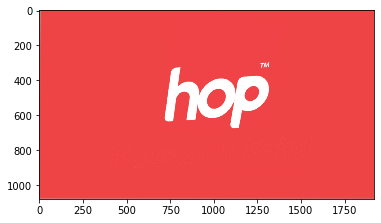

True

In [182]:
img_result = cv2.warpPerspective(img, M, (width, height))
imshow('', img_result)
cv2.imwrite('result01.png', img_result)

In [183]:
str = pytesseract.image_to_string('result01.png')
print(str)

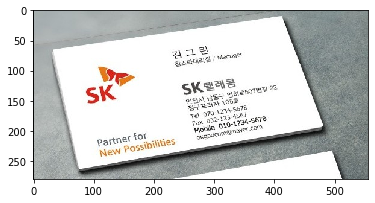

280 556


In [118]:
# 2차 연습
img = cv2.imread('sk_name.png')
img2 = img.copy()
imshow('', img2)
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
height, width = img2.shape[:2]
print(height, width)

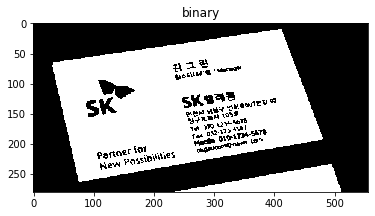

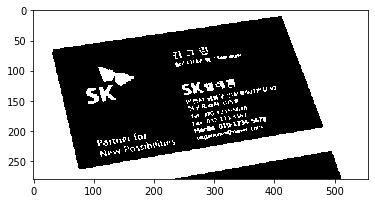

In [119]:
img_blur = cv2.GaussianBlur(gray, (3,3), 0)
_, binary =  cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow('binary', binary)
binary = 255 - binary
eroded = cv2.morphologyEx(binary, cv2.MORPH_ERODE, (5, 5))
imshow('', eroded)

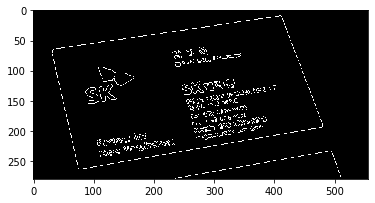

In [120]:
edged = cv2.Canny(eroded, 10, 250)
imshow('', edged)

[[[511 276]]

 [[490 233]]

 [[236 279]]

 [[490 233]]]
[[[413  10]]

 [[ 33  65]]

 [[ 75 262]]

 [[479 194]]]


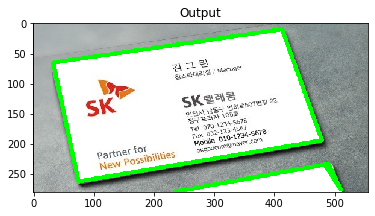

In [129]:
cnts, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    if len(approx) == 4:
        cv2.drawContours(img2, [approx], -1, (0, 255, 0), 5)
        print(approx)
        
imshow("Output", img2)

In [130]:
import math

def distance(x1, y1, x2, y2):
    result = math.sqrt( math.pow(x1 - x2, 2) + math.pow(y1 - y2, 2))
    return result

In [131]:
obj_width = distance(point_list[0][0], point_list[0][1], point_list[1][0], point_list[1][1])
obj_height = distance(point_list[0][0], point_list[0][1], point_list[2][0], point_list[2][1])

In [132]:
height, width = img.shape[:2]

idx = [1, 0, 2, 3]
point_list = np.array(approx[idx, 0, :])

pts1 = np.float32([list(point_list[0]), list(point_list[1]), list(point_list[2]), list(point_list[3])])
print(pts1) #원하는 이미지의 모서리 좌표

pts2 = np.float32([[0, 0], [obj_width, 0], [0, obj_height], [obj_width, obj_height]])
print(pts2) # 왼쪽 위 부터 좌 우 좌 우 순서

M = cv2.getPerspectiveTransform(pts1, pts2)
print(M)

[[ 33.  65.]
 [413.  10.]
 [ 75. 262.]
 [479. 194.]]
[[  0.        0.     ]
 [383.95963   0.     ]
 [  0.      201.4274 ]
 [383.95963 201.4274 ]]
[[ 9.58699311e-01 -2.04392747e-01 -1.83515487e+01]
 [ 1.57394025e-01  1.08744963e+00 -7.58782285e+01]
 [-6.23873460e-05  3.85667653e-04  1.00000000e+00]]


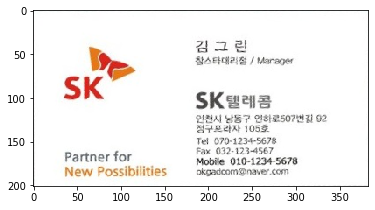

True

In [133]:
img_result = cv2.warpPerspective(img, M, (int(obj_width), int(obj_height)))
imshow('', img_result)
cv2.imwrite('out.png', img_result)

In [140]:
str = pytesseract.image_to_string('out.png', lang='eng+kor')
print(str)

print('--------------------------------------------')
import re

content = re.sub("[~]", "", str)

print(content)
print('--------------------------------------------')
num = []
nan = []

regex_1 = re.compile(r'\d{3,4} \d+-\d+')
regex_01 = re.compile(r'\d{3,4} \d+ \d+')
regex_001 = re.compile(r'\d{3,4}-\d+-\d+')

if regex_1.findall(content) != nan:
    num.append(regex_1.findall(content))
elif regex_01.findall(content) != nan:
    num.append(regex_01.findall(content))
elif regex_001.findall(content) != nan:
    num.append(regex_001.findall(content))

print(num)

regex_2 = re.compile(r'.*@.*')
email = regex_2.findall(content)
print(email)
print('--------------------------------------------')


Dp

SK

Partner for
New Possibilities

김 그 린
침 스 타 대리점 / Manager

SKzaae

IMAI 남동구 인 히 로 507 번 기 02
점 구 프 리자 1053.

Tel 070-124-5678

Fax 032-125-4567

Mobile 010-1234-5678
cokzadeom@naver com
--------------------------------------------
Dp

SK

Partner for
New Possibilities

김 그 린
침 스 타 대리점 / Manager

SKzaae

IMAI 남동구 인 히 로 507 번 기 02
점 구 프 리자 1053.

Tel 070-124-5678

Fax 032-125-4567

Mobile 010-1234-5678
cokzadeom@naver com
--------------------------------------------
[['070-124-5678', '032-125-4567', '010-1234-5678']]
['cokzadeom@naver com']
--------------------------------------------


In [135]:
print(num[0][0])

070-124-5678
